In [1]:
import re
import random
import pandas as pd
import hashlib

In [ ]:
with open('certcards2.txt', mode='r', encoding='utf8') as f:
    all_cards = f.read()
    
card_split_pattern = r'\n\n\n\d+\n'
all_cards = re.split(card_split_pattern, all_cards)
# Use re.DOTALL to allow . to match newline characters
card_pattern = re.compile(r'(.+?)\n([\s\S]+)', re.DOTALL)
cards = [(match.group(1), match.group(2)) for cstring in all_cards if (match := re.search(card_pattern, cstring))]

# removing the cards that have no content and trimming
cards = [(subject, stripped_content) for subject, content in cards if len(stripped_content := content.strip()) > 5]

def hash_string_md5(s):
    """
    Hashes a string using MD5 and returns a truncated hash for efficiency.

    Parameters:
    - s (str): The input string to hash.

    Returns:
    - str: The truncated hexadecimal hash string.
    """
    if pd.isnull(s):
        return None  # Handle NaN values gracefully
    return hashlib.md5(s.encode('utf-8')).hexdigest()  # Truncate to first 12 characters


def remake_card_document(existing_cards: pd.DataFrame, filename: str='certcards2.txt'):
    with open(filename, mode='w', encoding='utf8') as f:
        i = 1
        for _, row in existing_cards.iterrows():
            print(i)
            f.write('\n'*6)
            f.write(str(i)+'\n')  
            f.write(row['head']+'\n')
            f.write(row['body'])
            i+=1
            # print(F"{row['head']}: {row['age']:.4f}")


existing_cards = pd.DataFrame(cards, columns=['head', 'body'])


# existing_cards['age'] = [random.random() for _ in existing_cards.index]
existing_cards['hash'] = existing_cards['body'].apply(hash_string_md5)
existing_cards

card_ages = pd.read_json('card_ages.json')
# found_cards = pd.DataFrame(cards, columns=['head', 'body'])
# found_cards['hash'] = found_cards['body'].apply(hash_string_md5)

cards_to_age = pd.merge(
    left=existing_cards,
    right=card_ages[['hash', 'age']],
    left_on='hash', right_on='hash',
    how='left'
)

cards_to_age['head'] = cards_to_age['head'].str.strip()

cards_to_age['age'] = cards_to_age['age'].fillna(0)
cards_to_age['age'] = cards_to_age['age'] * 1.05
cards_to_age['age'] = cards_to_age['age'] + [random.random() for _ in cards_to_age.index]

cards_to_age.drop_duplicates(subset=['hash'], keep='first')
cards_to_age.to_json('card_ages.json', indent=2)

existing_cards = cards_to_age

In [3]:
existing_cards.groupby('head')['age'].sum().sort_values()

head
Home Network Project                 0.000000
Jane Eyre                           54.824255
OData                              105.320527
RAG                                107.764289
OAuth2.0                           111.323898
numpy                              114.983841
Power Platform                     116.201837
Developer Mode                     148.147443
Azure Functions Quickstart         148.963548
AKS                                155.413777
Kaggle                             157.193837
Dataverse Plugins                  166.428422
Dataverse                          185.094066
Azure OpenAI                       192.769462
OData Requests                     197.263528
Git                                203.014476
Workera.ai                         203.750231
Azure Storage                      205.008609
Azure VDI Project                  217.105732
Diffusers Documentation            232.013931
Conditional Access                 247.311801
Diffusers from Hugging Face  

<Axes: >

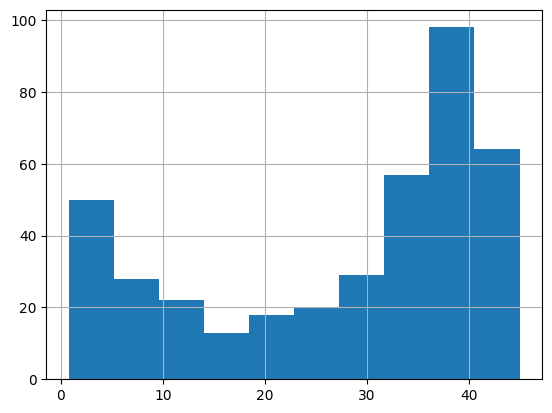

In [4]:
existing_cards['age'].hist()

# Completely Random Shuffle

In [5]:

# existing_cards = existing_cards.sample(frac=1)

# remake_card_document(filename='certcards2.txt', existing_cards = existing_cards)

# Age Shuffle

In [6]:
# existing_cards = existing_cards.sort_values('age', ascending=False)
# remake_card_document(filename='certcards2.txt', existing_cards=existing_cards)

In [7]:
existing_cards[['head', 'age']].head(n = 10)

,head,age
0,Kaggle,36.370813
1,Search Engine Optimization,11.134458
2,Azure Functions Quickstart,40.351770
3,DNS,2.941695
4,Azure Functions,28.962925
5,Kali Linux,23.775156
6,MS Identity Platform,35.116319
7,MS Identity Platform,29.622322
8,PP365,10.635044
9,OData,1.778203


# Headers with fewest notes first

In [ ]:
# frequency = existing_cards['head'].value_counts(ascending=True)
# # print(frequency)

# existing_cards = pd.merge(
#     left=existing_cards,
#     right=frequency.rename('frequency'),
#     left_on='head', right_index=True,
#     how='left'
# )
# existing_cards['oldest'] = existing_cards.groupby('head')['age'].transform('max')
# existing_cards['oldest'] *= -1

# existing_cards.sort_values(['frequency', 'oldest', 'head'], ascending=True, inplace=True)

# remake_card_document(filename='certcards2.txt', existing_cards=existing_cards)

KeyError: 'frequency'

In [10]:
existing_cards['head'].value_counts()

Home Network Project              44
DNS                               36
Azure Kubernetes Learning Path    34
Search Engine Optimization        29
Diffusers Library                 28
Python                            27
sklearn                           21
Azure Functions                   19
OData                             17
MS Identity Platform              13
Power BI                          12
Kali Linux                        11
Jane Eyre                         10
Diffusers from Hugging Face       10
PP365                             10
Dataverse Queries                  8
AKS                                8
Azure AI Search                    8
pandas                             8
Conditional Access                 7
General                            7
Dataverse Plugins                  7
Azure OpenAI                       6
Git                                6
Workera.ai                         6
Azure VDI Project                  6
Diffusers Documentation            6
D

# Focus on one header

In [ ]:
# heads = existing_cards['head'].value_counts()
# heads = heads[heads > 5].index.tolist()
# one_header = random.sample(heads, 1)[0]
# existing_cards['pick_head'] = existing_cards['head'].apply(
#     lambda h: 0 if h == one_header else 1 
# )

# remake_card_document(existing_cards=existing_cards.sort_values('pick_head'))